In [5]:
import pandas as pd
df = pd.read_csv('C:/Users/ajjadhav/Downloads/topic_modeling_dataset.csv')
df = df.iloc[:,1:]

In [6]:
df.head()

,appname,review,star,char_count,word_count,avg_word,stopwords,clean_review,polarity,subjectivity,sentiment
0,AmOnline,It's faster with an improved interface compare...,1,618,115,4.382609,49,faster improved interface compared previous an...,0.130456,0.558829,0.130456
1,AmOnline,Worst experience after updating. Can't check s...,1,357,57,5.280702,13,worst experience updating cant check saving ac...,-0.132955,0.352652,-0.132955
2,AmOnline,Was prompted to update when opening the app to...,1,489,88,4.568182,26,prompted update opening app today updating can...,0.012500,0.433333,0.012500
3,AmOnline,This is the worst app I have used. There are a...,5,498,96,4.197917,39,worst app used already many complaint bad revi...,-0.070937,0.603444,-0.070937
4,AmOnline,"Great new app, but need to improve a bit in te...",4,316,61,4.196721,24,great new app need improve bit term app loadin...,0.144416,0.748052,0.144416


In [ ]:
df = df[df['clean_review'].notna()]

In [16]:
long_string = ','.join(list(df['clean_review'].values))

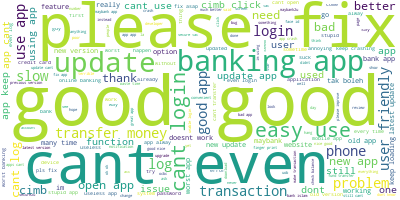

In [17]:
from wordcloud import WordCloud
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


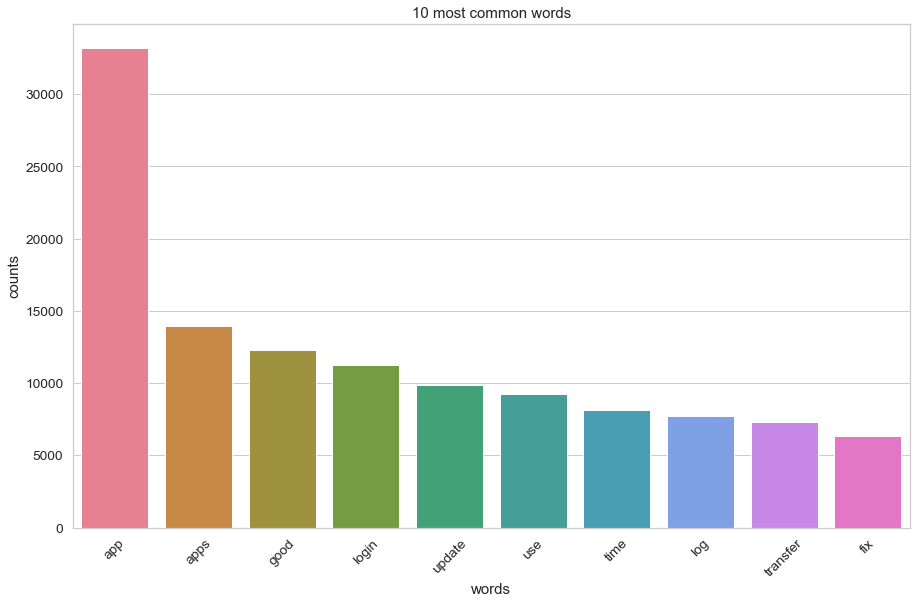

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=45) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['clean_review'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [20]:
from sklearn.decomposition import LatentDirichletAllocation as LDA


def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
transfer app use easy money user make transaction account apps

Topic #1:
good ok nice app apps secure2u job service far application

Topic #2:
app login log time account password phone use need tac

Topic #3:
tak nak boleh ni apps update la dah guna saya

Topic #4:
app apps update fix time login problem open slow log
